# Analysing the dataset of the inventories of red wine. #

In [1]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats


In [2]:
data = pd.read_csv('data.csv')
data

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,NaN,0.65,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


# __Now we need describe the dataset to identify and pre-process any null and duplicate values.__ #

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1600 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1600 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1598 non-null   float64
 6   free sulfur dioxide   1600 non-null   float64
 7   total sulfur dioxide  1600 non-null   float64
 8   density               1600 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


## A way to identify null values is to: ##

In [4]:
data_summary = data.describe()

data_summary

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1600.000000,1601.000000,1600.000000,1601.000000,1598.000000,1600.000000,1600.000000,1600.000000,1600.000000,1601.000000,1601.000000,1600.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.740039,0.178981,0.194745,1.409138,0.047076,10.458487,32.977723,0.001887,0.154338,0.169471,1.065495,0.807368
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.250000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
null_counts = data.isnull().sum()

null_counts

ID                      0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

## In order to pre- process the dataset we need to rename some of the columns in the dataset.

In [6]:
data = data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
data

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,NaN,0.65,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


### From the data summary we see the the columns that contain null values.

# In order to get rid of the null values for good we can do the following:

In [7]:
y = data.dropna()
y

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
5,6,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


__We don't want to reduce the number of rows so we won't use the dropna method__.

## Pre-Processing using the mean method ##

#### We choose to use the mean method because it gives us the average value of the columns that have null values.

In [8]:
mean_fixed_acidity = data.fixed_acidity.mean()
mean_citric_acid = data.citric_acid.mean()
mean_chlorides = data.chlorides.mean()
mean_free_sulfur_dioxide = data.free_sulfur_dioxide.mean()
mean_total_sulfur_dioxide = data.total_sulfur_dioxide.mean()
mean_density = data.density.mean()
mean_pH = data.pH.mean()
mean_quality = data.quality.mean()

In [9]:
print(f'fixed_acidity: {mean_fixed_acidity}')
print(f'citric_acid: {mean_citric_acid}')
print(f'chlorides: {mean_chlorides}')
print(f'free_sulfur_dioxide: {mean_free_sulfur_dioxide}')
print(f'total_sulfur_dioxide: {mean_total_sulfur_dioxide}')
print(f'density: {mean_density}')
print(f'pH: {mean_pH}')
print(f'quality: {mean_quality}')

fixed_acidity: 8.319875000000001
citric_acid: 0.271175
chlorides: 0.0874874843554443
free_sulfur_dioxide: 15.886875
total_sulfur_dioxide: 46.52
density: 0.9967456437500002
pH: 3.3111062500000004
quality: 5.63625


In [10]:
data['fixed_acidity'] = data['fixed_acidity'].fillna(mean_fixed_acidity)
data['citric_acid'] = data['citric_acid'].fillna(mean_citric_acid)
data['chlorides'] = data['chlorides'].fillna(mean_chlorides)
data['free_sulfur_dioxide'] = data['free_sulfur_dioxide'].fillna(mean_free_sulfur_dioxide)
data['total_sulfur_dioxide'] = data['total_sulfur_dioxide'].fillna(mean_total_sulfur_dioxide)
data['density'] = data['density'].fillna(mean_density)
data['pH'] = data['pH'].fillna(mean_pH)
data['quality'] = data['quality'].fillna(mean_quality)

In [11]:
data

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.510000,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.200000,0.68,9.8,5.0
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.311106,0.65,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.160000,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.510000,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.520000,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.420000,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.570000,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.390000,0.66,11.0,6.0


__Checking our dataset to see if there are any null values again__

In [12]:
data.describe()

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.739495,0.178981,0.194684,1.409138,0.047032,10.455218,32.967416,0.001887,0.154290,0.169471,1.065495,0.807116
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### There are no null values anymore

# Pre - Processing data duplicates

In [13]:
q_duplicates = data.duplicated().sum()

q_duplicates

0

__No duplicates__

# Statistical inferences of each of the columns in the dataset

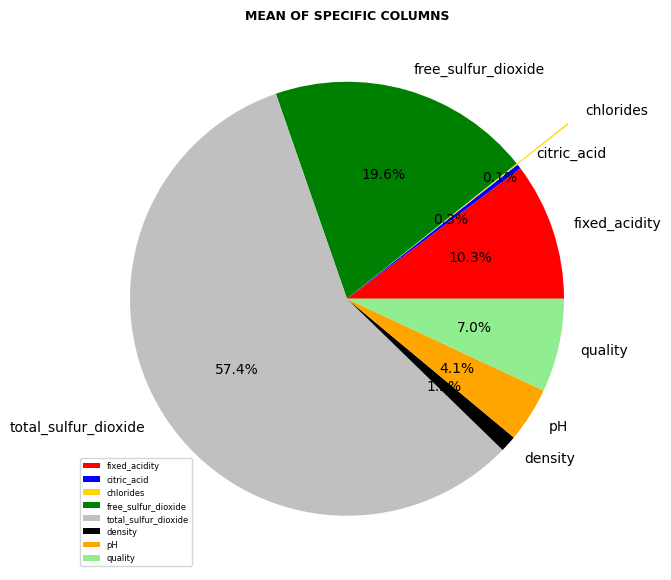

In [14]:
q =np.array([8.319875,0.271175, 0.08748748435, 15.886875, 46.52, 0.99674564375, 3.31110625, 5.63625 ])
myLabels =['fixed_acidity', 'citric_acid', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density', 'pH', 'quality']
explode= (0, 0, 0.3, 0, 0, 0, 0, 0)

plt.figure(figsize=(7,10))
plt.title('MEAN OF SPECIFIC COLUMNS', fontsize=9, fontweight='bold')
# plt.style.use('ggplot')
plt.pie(q,labels=myLabels,explode=explode,startangle=0,autopct='%.1f%%',colors=('red','blue','gold','green','silver','black','orange','lightgreen'))
plt.legend(loc='lower left', fontsize=6)
plt.show()

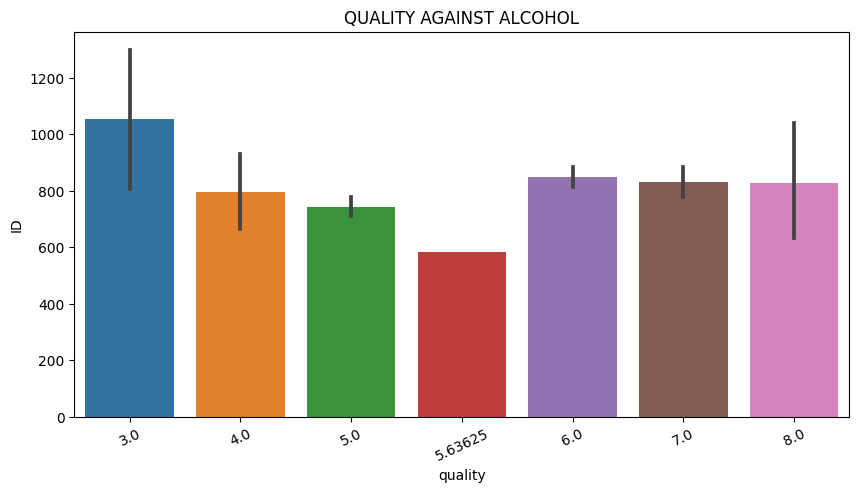

In [15]:
plt.figure(figsize=(10, 5))
viz = sn.barplot(x=data['quality'], y=data['ID'])
viz.set_xticklabels(viz.get_xticklabels(), rotation=25)
plt.title('QUALITY AGAINST ALCOHOL')
plt.show()

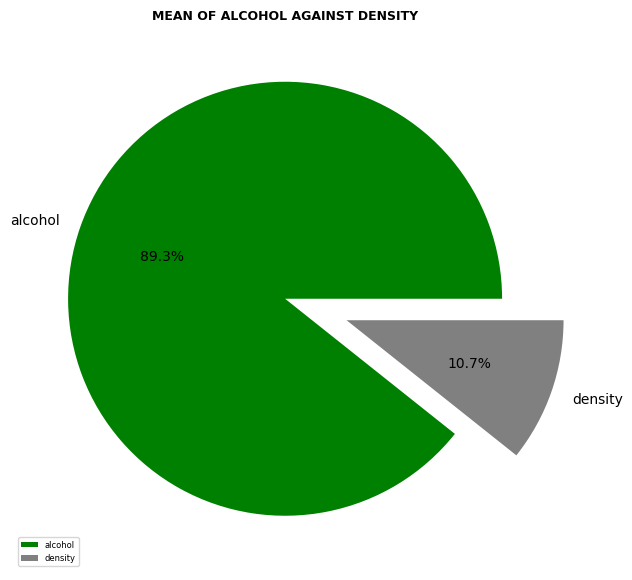

In [16]:
q =np.array([8.319875, 0.9967456437])
myLabels =['alcohol', 'density']
explode= (0, 0.3)

plt.figure(figsize=(7,10))
plt.title('MEAN OF ALCOHOL AGAINST DENSITY', fontsize=9, fontweight='bold')
plt.pie(q,labels=myLabels,explode=explode,startangle=0,autopct='%.1f%%',colors=('green','grey'))
plt.legend(loc='lower left', fontsize=6)
plt.show()

__The piechart above shows that alcohol is relatively larger in percentage than density__

# We now make a correlation of our dataset for each columns. #

In [17]:
data.corr()

,ID,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
ID,1.000000,-0.267899,-0.009544,-0.153294,-0.031589,-0.119131,0.091145,-0.113809,-0.368725,0.135082,-0.124243,0.245028,0.065841
fixed_acidity,-0.267899,1.000000,-0.255557,0.670856,0.114595,0.093472,-0.152932,-0.113325,0.667693,-0.682452,0.182291,-0.061858,0.124602
volatile_acidity,-0.009544,-0.255557,1.000000,-0.552909,0.001877,0.060748,-0.010591,0.076247,0.022753,0.235182,-0.261364,-0.202672,-0.390787
citric_acid,-0.153294,0.670856,-0.552909,1.000000,0.143517,0.203981,-0.061252,0.036014,0.364104,-0.542637,0.312839,0.109925,0.226772
residual_sugar,-0.031589,0.114595,0.001877,0.143517,1.000000,0.055379,0.186797,0.201765,0.355203,-0.085590,0.005668,0.042273,0.013847
chlorides,-0.119131,0.093472,0.060748,0.203981,0.055379,1.000000,0.005584,0.047197,0.200387,-0.265263,0.371007,-0.221230,-0.128504
free_sulfur_dioxide,0.091145,-0.152932,-0.010591,-0.061252,0.186797,0.005584,1.000000,0.666984,-0.021800,0.069906,0.051708,-0.069590,-0.051606
total_sulfur_dioxide,-0.113809,-0.113325,0.076247,0.036014,0.201765,0.047197,0.666984,1.000000,0.071024,-0.066823,0.042317,-0.205843,-0.186267
density,-0.368725,0.667693,0.022753,0.364104,0.355203,0.200387,-0.021800,0.071024,1.000000,-0.341413,0.147774,-0.496269,-0.174267
pH,0.135082,-0.682452,0.235182,-0.542637,-0.085590,-0.265263,0.069906,-0.066823,-0.341413,1.000000,-0.196542,0.205511,-0.058135


__We identify from the above data that each column matching to it's own row correlates to a value of 1.__